In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read data (we choose 1. container)
df_garbage = pd.read_csv("../data/preprocessed/cleaned_data_v2.csv")
container1 = df_garbage.loc[(df_garbage["container_id"]==1)]

In [3]:
height = container1[["datum", "height_in_cm"]].sort_values("datum")
height.head(5)

,datum,height_in_cm
7305,2020-05-09 00:52:00.051726,8
7304,2020-05-09 01:51:59.856614,8
7303,2020-05-09 02:51:59.658736,8
7302,2020-05-09 03:51:59.488678,8
7301,2020-05-09 04:51:59.293896,8


In [4]:
# drop outlier
height.drop(height.loc[height["height_in_cm"]>=225].index, inplace=True)
height = height.reset_index(drop=True)

In [5]:
# set datum as datetime index
height["datum"] = pd.to_datetime(height['datum'])
height = height.set_index("datum")

In [6]:
height.head()

,height_in_cm
datum,
2020-05-09 00:52:00.051726,8
2020-05-09 01:51:59.856614,8
2020-05-09 02:51:59.658736,8
2020-05-09 03:51:59.488678,8
2020-05-09 04:51:59.293896,8


In [7]:
# this is for a smoothed-version of the data -> you have to set new parameters in the forecast.

# #get average value for each day instead of hours
# height = height["height_in_cm"].resample("D").mean().round()
# #check for NaN values 
# print(np.isnan(height).any())
# # replace NA values with with value in row before
# height = height.fillna(method='ffill')
# #check for NaN values
# print(np.isnan(daily).any())

In [8]:
# split into train and testing
y_train = height[:len(height)-700]
y_test = height[len(height)-700:]

In [9]:
model1 = ExponentialSmoothing(y_train, seasonal="add", seasonal_periods = 450) # got the best result with 450
fit = model1.fit()
pred = fit.forecast(700)

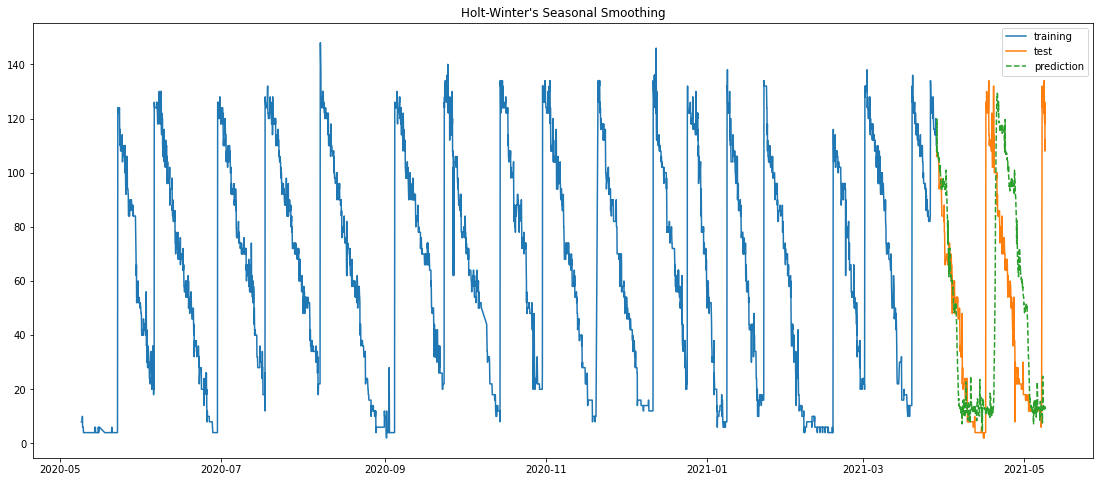

In [10]:
plt.figure(figsize=(19, 8))
plt.plot(y_train.index, y_train.values, label = "training");
plt.plot(y_test.index, y_test.values, label='test');
plt.plot(y_test.index, pred, linestyle='--', label = "prediction")
plt.legend();
plt.title("Holt-Winter's Seasonal Smoothing");

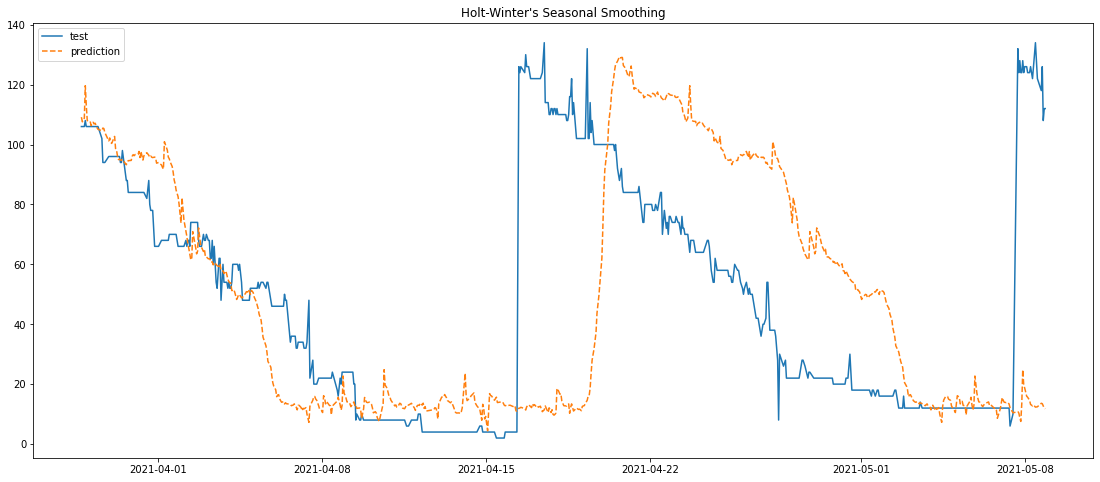

In [11]:
plt.figure(figsize=(19, 8))
plt.plot(y_test.index, y_test.values, label='test');
plt.plot(y_test.index, pred, linestyle='--', label = "prediction")
plt.legend();
plt.title("Holt-Winter's Seasonal Smoothing");

## Forecast

In [12]:
model2 = ExponentialSmoothing(height, seasonal="add", seasonal_periods = 500) 
fit = model2.fit()
pred = fit.forecast(600)

In [13]:
# set pred index to date_time for hourly measurements 
index_future_dates=pd.date_range(start="2021-05-08 21:00:00", end = "2021-06-02 20:00:00", freq= "H")
pred.index = index_future_dates

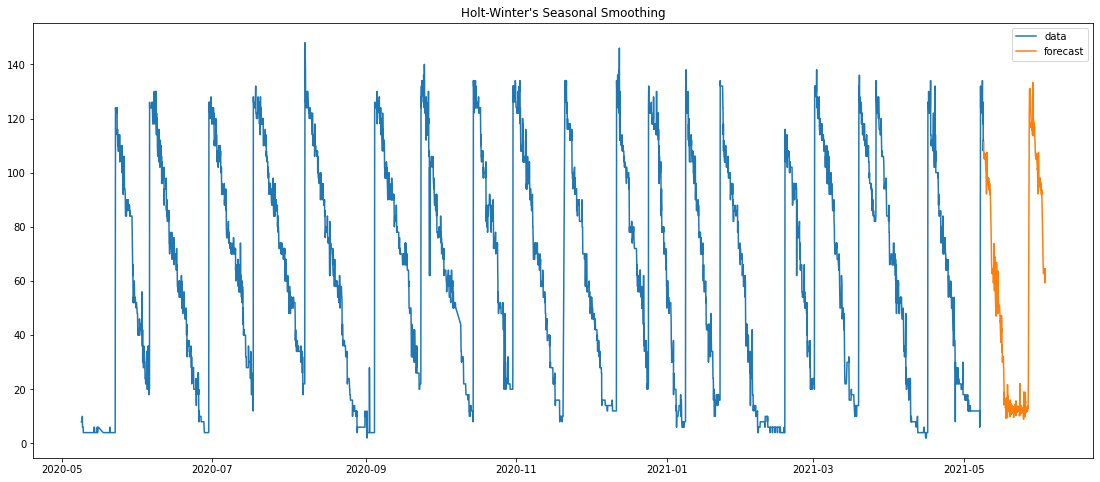

In [14]:
plt.figure(figsize=(19, 8))
plt.plot(height, label = "data");
plt.plot(pred,label='forecast');
plt.legend();
plt.title("Holt-Winter's Seasonal Smoothing");